# PART 1: EXPLORE DATA


##      1.1/  Summary Data



In [3]:

#Import needed library

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('AB_NYC_2019.csv')

#Review data/Checking null data values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 1.2 / Find and fill missing values



In [4]:
#Drop na values:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

## 1.3/ Convert date-time columns



In [5]:
#Converse last_review column into datetime
data['last_review']=pd.to_datetime(data['last_review'])
#Create year column from last_review and df_summary
data['year']=[data['last_review'].iloc[i].year for i in range(len(data))]

data['year'].head()

0    2018
1    2019
3    2019
4    2018
5    2019
Name: year, dtype: int64

## 1.4/ Summary percentiles of price column, and examine some important categorical columns



In [6]:


#Let examine some importance categorical variables
print("Neighbourhood Groups:", data['neighbourhood_group'].unique().tolist())
print("Room Types:", data['room_type'].unique().tolist())
#We also examine price variable
print(data['price'].describe(percentiles=[.25, .50, .75, .95]))

#We can see 95% of price is below 330



Neighbourhood Groups: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Room Types: ['Private room', 'Entire home/apt', 'Shared room']
count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
95%        330.000000
max      10000.000000
Name: price, dtype: float64


In [38]:
#Lets split data into 2 parts which we will use for later.One is have price column below 330 and other is above 330
filter_df_1=data[data['price']<=330]
filter_df_2=data[data['price']>330]

## 1.5/ Create data frame capture the trend of frequency and median of price throughout years



In [7]:
#Create df_summary which group by year and price have agg on [count,median]

df_summary=data.groupby('year')['price'].agg(['count','median'])
df_summary

,count,median
year,,
2011,7,140.0
2012,25,125.0
2013,48,150.0
2014,199,140.0
2015,1388,110.0
2016,2703,105.0
2017,3203,100.0
2018,6047,100.0
2019,25201,105.0


In [8]:
#Let create Percent_change_on_count column for "The First part plot"

df_summary['percent_change_on_frequency']=[100 if i==0 \
                              else round(100*(df_summary['count'].iloc[i]-df_summary['count'].iloc[i-1])/df_summary['count'].iloc[i-1],2) \
                              for i in range(len(df_summary))]

#Reset year index for the plot 

df_summary.reset_index(inplace=True)

df_summary


,year,count,median,percent_change_on_frequency
0,2011,7,140.0,100.00
1,2012,25,125.0,257.14
2,2013,48,150.0,92.00
3,2014,199,140.0,314.58
4,2015,1388,110.0,597.49
5,2016,2703,105.0,94.74
6,2017,3203,100.0,18.50
7,2018,6047,100.0,88.79
8,2019,25201,105.0,316.75


# PART 2: PLOT SUMMARY DATA:


## 2.1/ Plot of Trending of  Percent_change_ on_ frequency and Median price :




Text(0, 0.5, 'Median_Price')

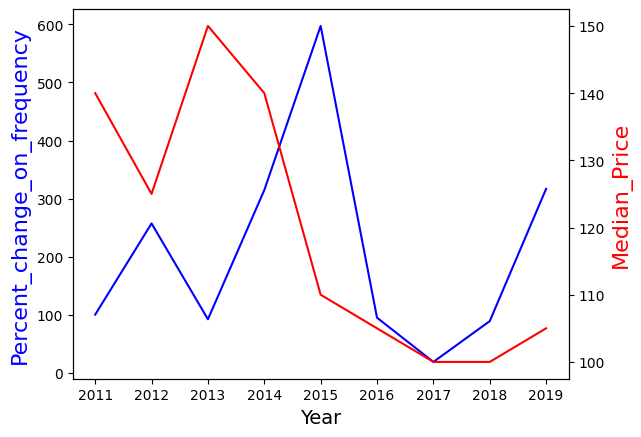

In [9]:
#Define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(df_summary['year'], df_summary['percent_change_on_frequency'], color='blue')

#add x-axis label
ax.set_xlabel('Year', fontsize=14)

#add y-axis label
ax.set_ylabel('Percent_change_on_frequency', color='blue', fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df_summary['year'], df_summary['median'], color='red')

#add second y-axis label
ax2.set_ylabel('Median_Price', color='red', fontsize=16)

In [25]:
#Create function of data transform into right format to make plot easily:
def data_transform(df,group_cols,agg_cols):
    df_temp=df.groupby(group_cols)[['price']].agg(agg_cols)
    for i in range(len(group_cols)-1):
        df_temp=df_temp.unstack().fillna(0)
    df_temp.index=[int(df_temp.index[i]) for i in range(len(df_temp.index))]
    return df_temp

#Create function for plotting:

def data_plotting(df):
    type_plot=['bar']*2+['line']
    type_agg=['count']+['median']*2
     #Final summary plot (on count)
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Distribution of frequency and median", fontsize=18, y=0.95)
    # loop through the length of tickers and keep track of index
    for n, ele in enumerate(type_plot):
    # add a new subplot iteratively
        ax=plt.subplot(2, 2, n + 1)
        plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
        df['price'][type_agg[n]].plot(ax=ax,kind=ele)
        ax.set_title('Distribution of {}'.format(type_agg[n]))
        ax.set_xlabel("Year")
        ax.set_ylabel('{}'.format(type_agg[n]))


In [26]:
#Build new Data  base on data_transform function base on group of neighbourhood_group:
df_summary1=data_transform(data,['year','neighbourhood_group'],['count','median'])
df_summary1.head()


price                                                 \
                    count                                         median   
neighbourhood_group Bronx Brooklyn Manhattan Queens Staten Island  Bronx   
2011                  0.0      5.0       1.0    1.0           0.0    0.0   
2012                  0.0     10.0      11.0    4.0           0.0    0.0   
2013                  0.0     22.0      26.0    0.0           0.0    0.0   
2014                  2.0     87.0      89.0   20.0           1.0   61.5   
2015                  5.0    619.0     668.0   92.0           4.0   80.0   

                                                             
                                                             
neighbourhood_group Brooklyn Manhattan Queens Staten Island  
2011                   249.0     100.0  140.0           0.0  
2012                   137.5     125.0   77.5           0.0  
2013                   126.5     172.5    0.0           0.0  
2014                   115.0     170.0   90.0          75.0  
2015                    95.0     130.0   80.0         339.5

In [27]:
#Build new Data  base on data_transform function base on group of room_type:
df_summary2=data_transform(data,['year','room_type'],['count','median'])
df_summary2.head()

price                                           \
                    count                                   median   
room_type Entire home/apt Private room Shared room Entire home/apt   
2011                  2.0          5.0         0.0           199.5   
2012                 15.0         10.0         0.0           140.0   
2013                 33.0         15.0         0.0           160.0   
2014                131.0         65.0         3.0           170.0   
2015                732.0        629.0        27.0           150.0   

                                    
                                    
room_type Private room Shared room  
2011             140.0         0.0  
2012              80.0         0.0  
2013              85.0         0.0  
2014              75.0       105.0  
2015              75.0        65.0

## 2.2/ Plot of frequency and median price base on neighbour_hood group:


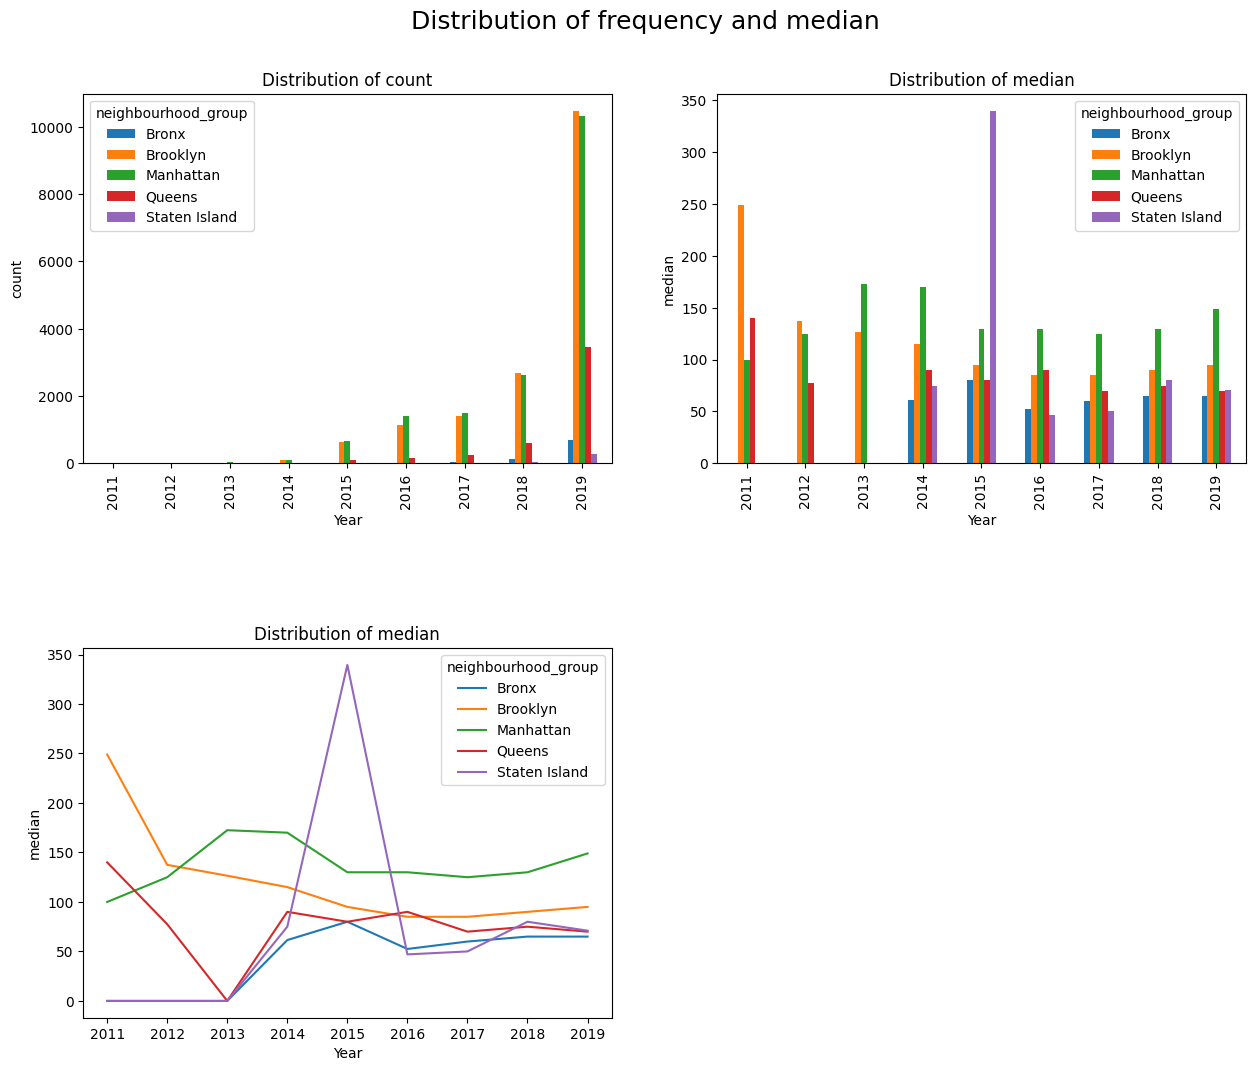

In [28]:
#Plotting graph:

#Distribution of frequency and median of Neighbourhood_group
data_plotting(df_summary1)


## 2.3/ Plot of frequency and median price base on room type group:



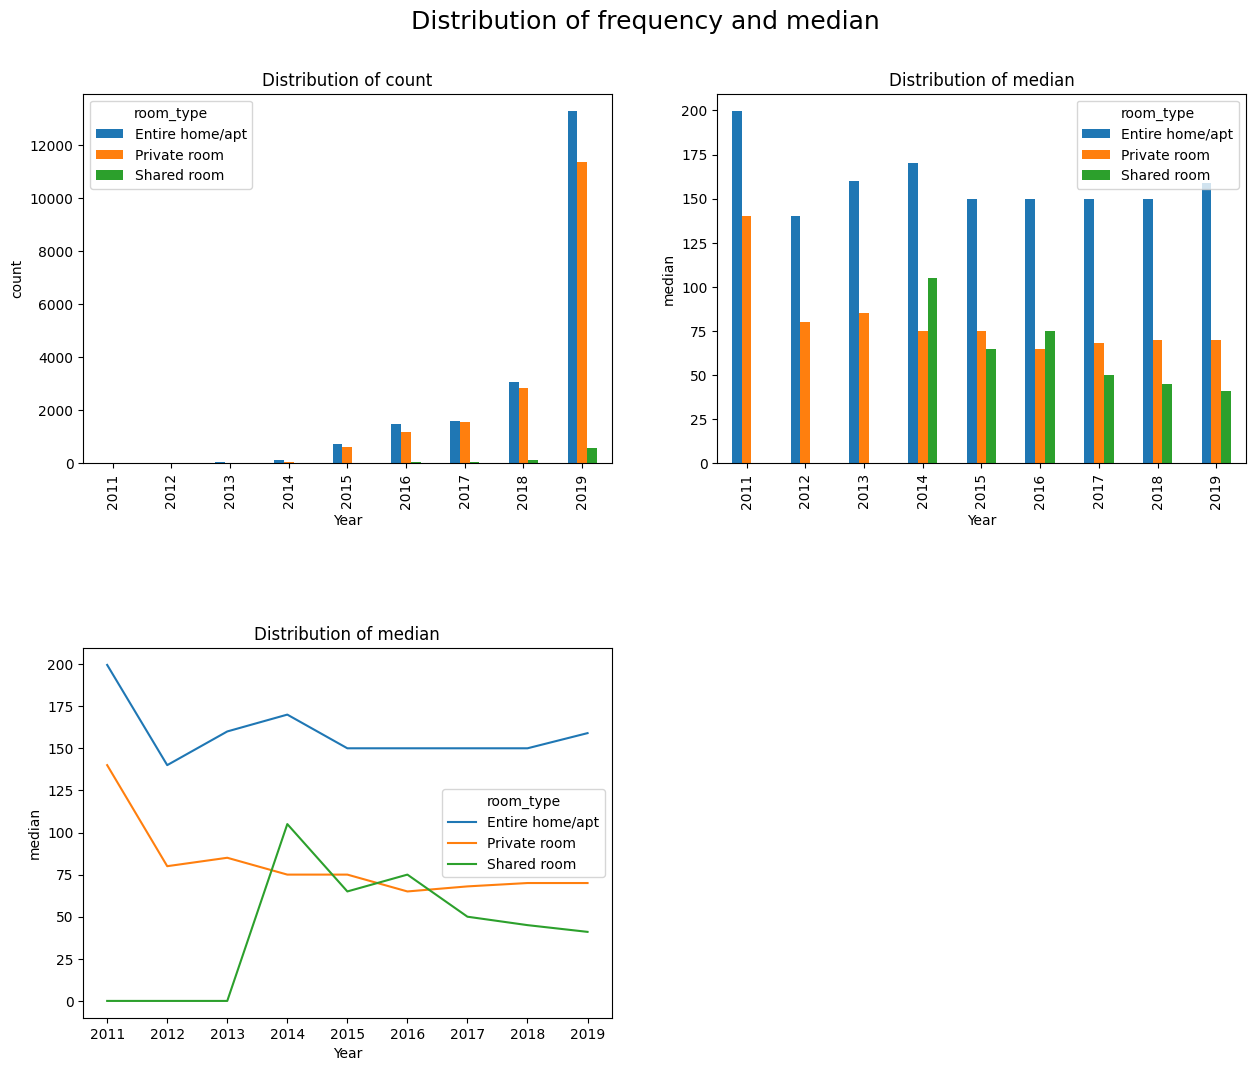

In [29]:
##Distribution of frequency and median of Neighbourhood_group
data_plotting(df_summary2)

## 2.4/ Combine graph on neighbour_hood and room type on frequency(count) and median:




In [32]:
#Build new Data  base on data_transform function base on group of room_type and neighbourhood_group:

df_summary3=data_transform(data,['year','room_type','neighbourhood_group'],['count','median'])
df_summary3.head()

price                                           \
                              count                                            
neighbourhood_group           Bronx                                 Brooklyn   
room_type           Entire home/apt Private room Shared room Entire home/apt   
2011                            0.0          0.0         0.0             1.0   
2012                            0.0          0.0         0.0             6.0   
2013                            0.0          0.0         0.0            16.0   
2014                            1.0          1.0         0.0            49.0   
2015                            2.0          3.0         0.0           299.0   

                                                                           \
                                                                            
neighbourhood_group                                Manhattan                
room_type           Private room Shared room Entire home/apt Private room   
2011                         4.0         0.0             1.0          0.0   
2012                         4.0         0.0             7.0          4.0   
2013                         6.0         0.0            17.0          9.0   
2014                        37.0         1.0            68.0         19.0   
2015                       313.0         7.0           387.0        264.0   

                                                 ...              \
                                                 ...      median   
neighbourhood_group                      Queens  ...    Brooklyn   
room_type           Shared room Entire home/apt  ... Shared room   
2011                        0.0             0.0  ...         0.0   
2012                        0.0             2.0  ...         0.0   
2013                        0.0             0.0  ...         0.0   
2014                        2.0            12.0  ...        29.0   
2015                       17.0            40.0  ...        45.0   

                                                                              \
                                                                               
neighbourhood_group       Manhattan                                   Queens   
room_type           Entire home/apt Private room Shared room Entire home/apt   
2011                          100.0          0.0         0.0             0.0   
2012                          145.0         97.5         0.0           107.5   
2013                          175.0        125.0         0.0             0.0   
2014                          180.0        100.0       150.0           135.0   
2015                          180.0         90.0        80.0           104.0   

                                                                           \
                                                                            
neighbourhood_group                            Staten Island                
room_type           Private room Shared room Entire home/apt Private room   
2011                       140.0         0.0             0.0          0.0   
2012                        67.5         0.0             0.0          0.0   
2013                         0.0         0.0             0.0          0.0   
2014                        64.0         0.0            75.0          0.0   
2015                        60.0        50.0           339.5          0.0   

                                 
                                 
neighbourhood_group              
room_type           Shared room  
2011                        0.0  
2012                        0.0  
2013                        0.0  
2014                        0.0  
2015                        0.0  

[5 rows x 30 columns]

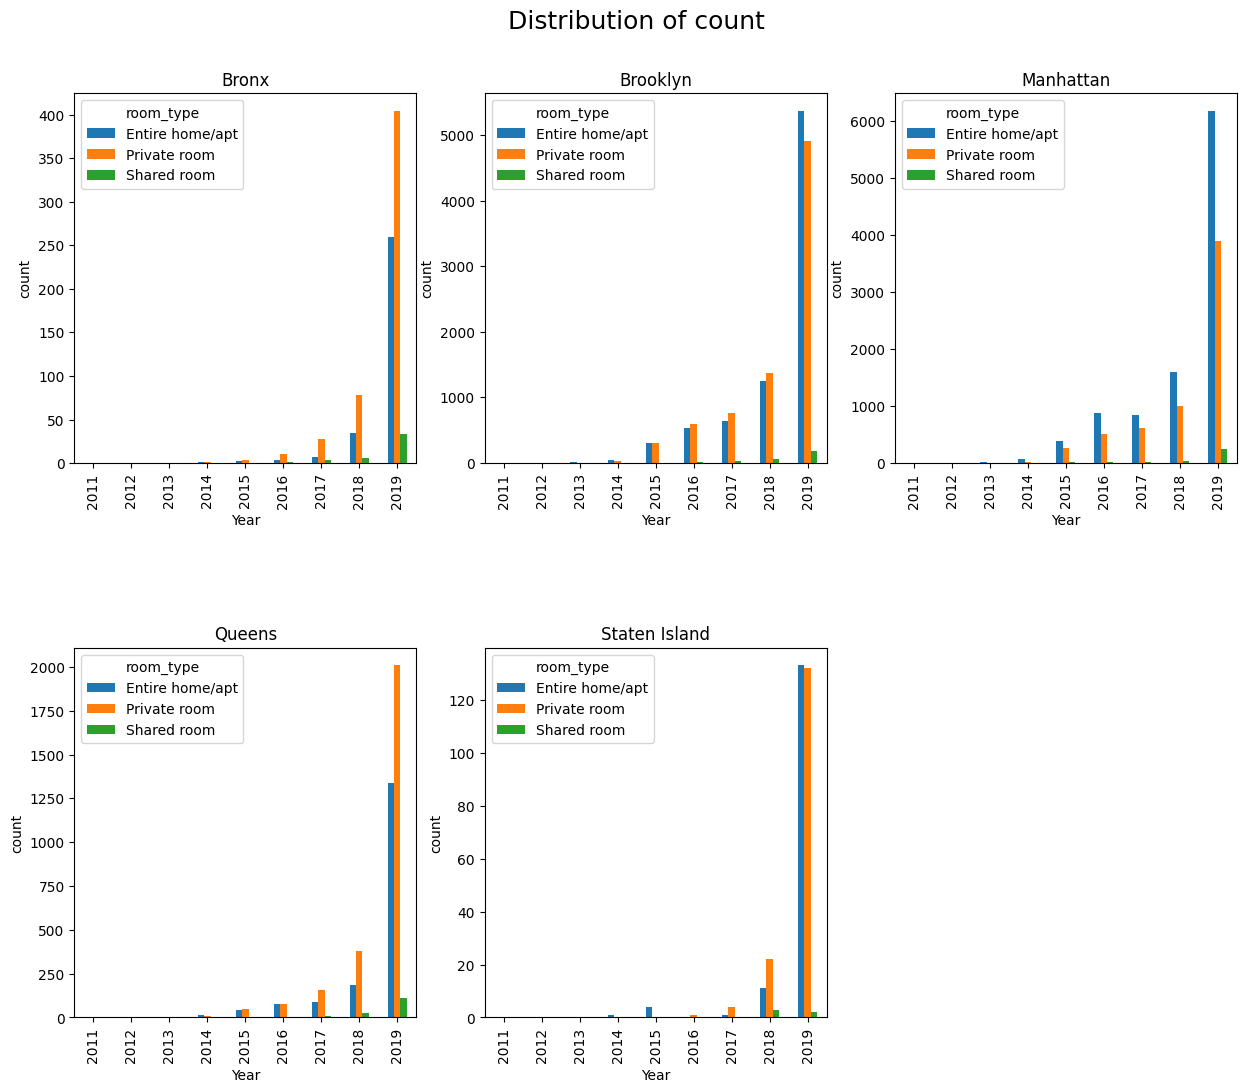

In [35]:
def data_plotting_2(df,type_dist):# Here type_dist is the list of distrbution we want (count or median):

    nb=data['neighbourhood_group'].unique()
    nb.sort()
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Distribution of {}".format(type_dist[0]), fontsize=18, y=0.95)
# loop through the length of tickers and keep track of index
    for n, ele in enumerate(nb):
    # add a new subplot iteratively
        ax=plt.subplot(2, 3, n + 1)
        plt.subplot(2, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
        df['price'][type_dist[0]][ele].plot(ax=ax,kind='bar')
        ax.set_title('{}'.format(ele))
        ax.set_xlabel("Year")
        ax.set_ylabel(type_dist[0])

data_plotting_2(df_summary3,['count'])

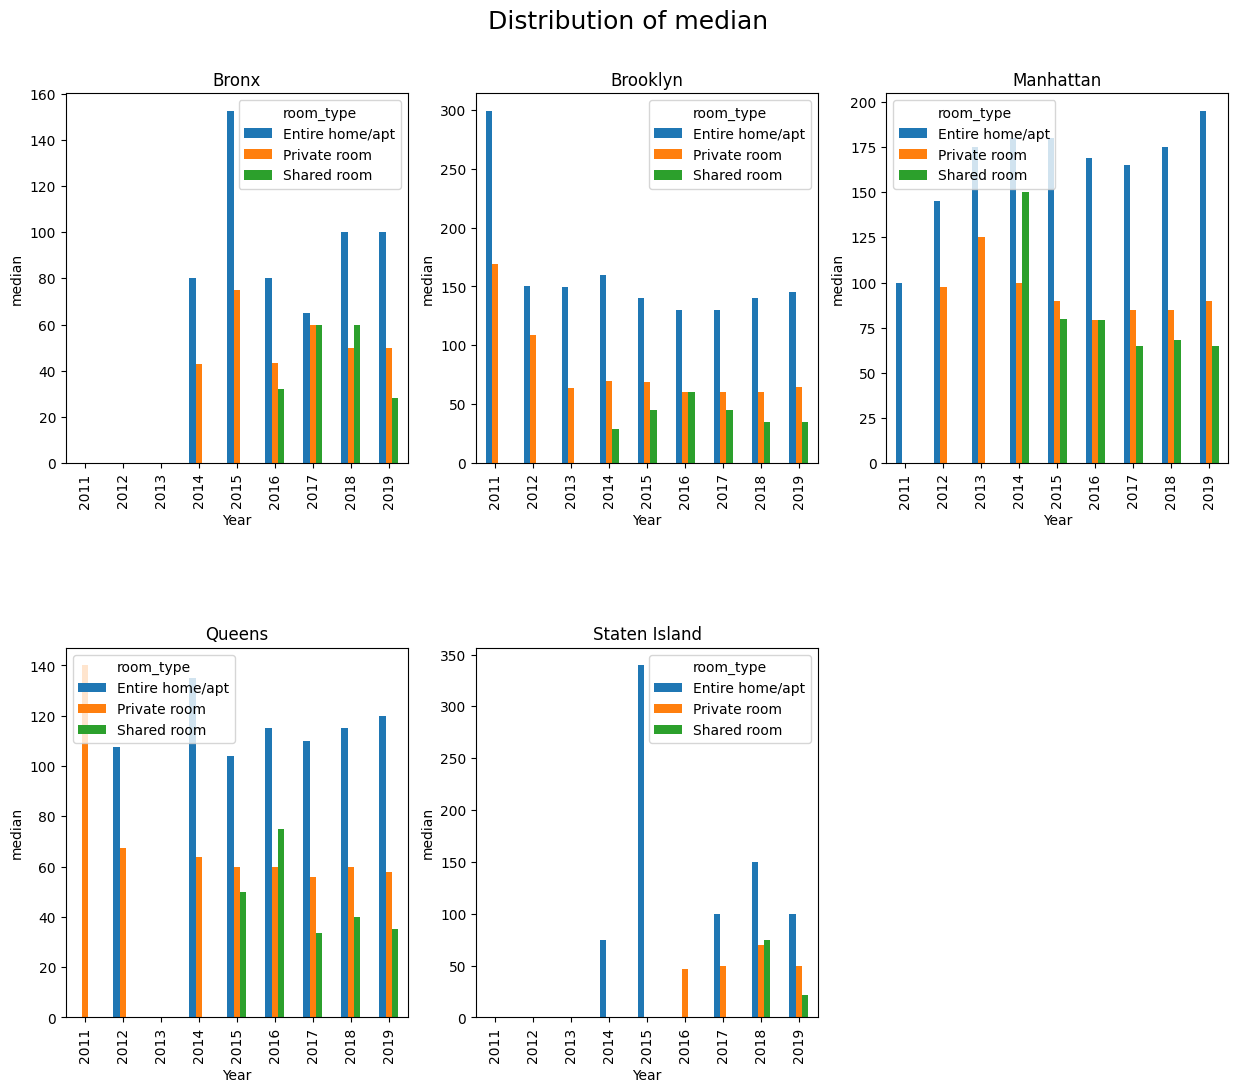

In [37]:
data_plotting_2(df_summary3,['median'])

## 2.5/ Use violinplot to summary distribution of price on each neighbour_hood group





/var/folders/qq/n0f3w4yn6294s50sn7ddg6zm0000gn/T/ipykernel_1453/160595396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dat, x=group_cols[0], y='price',ax=ax,
/var/folders/qq/n0f3w4yn6294s50sn7ddg6zm0000gn/T/ipykernel_1453/160595396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dat, x=group_cols[0], y='price',ax=ax,


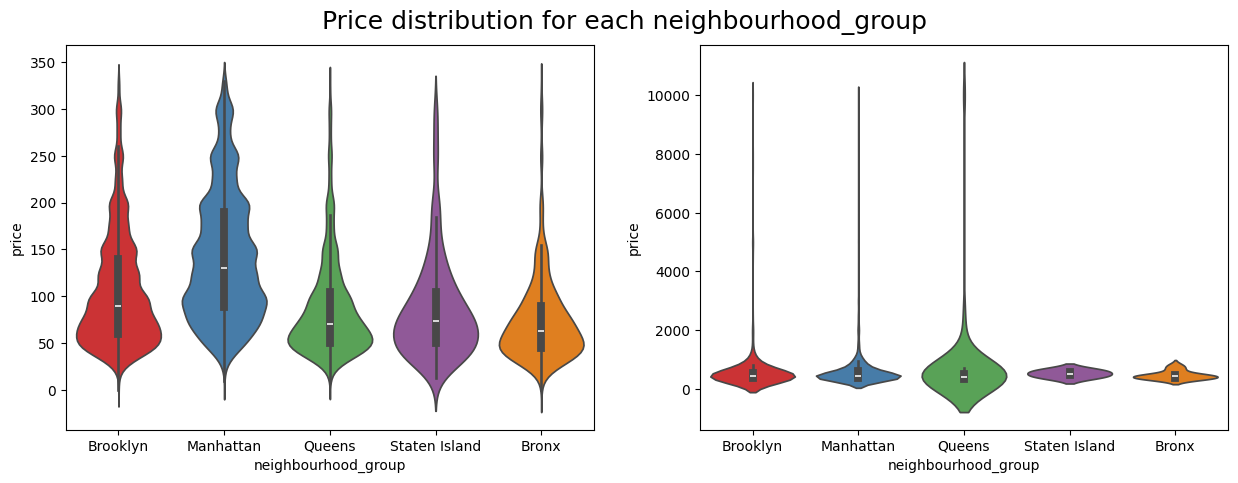

In [43]:
# Using violinplot to show density and distribtuion of price:
df_summary4=[filter_df_1,filter_df_2]
def data_plotting_violin(df,group_cols):
    plt.figure(figsize=(15, 5))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Price distribution for each {} '.format(group_cols[0]), fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
    for n,dat in enumerate(df):
# add a new subplot iteratively
        ax=plt.subplot(1,2, n + 1)
        plt.subplot(1,2, n + 1)

    # filter df and plot ticker on the new subplot axis
        sns.violinplot(data=dat, x=group_cols[0], y='price',ax=ax,
                   order=data[group_cols[0]].unique(),palette='Set1')
    plt.show()


data_plotting_violin(df_summary4,['neighbourhood_group'])

## 2.6/ Use violinplot to summary distribution  of price on each room type group

/var/folders/qq/n0f3w4yn6294s50sn7ddg6zm0000gn/T/ipykernel_1453/160595396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dat, x=group_cols[0], y='price',ax=ax,
/var/folders/qq/n0f3w4yn6294s50sn7ddg6zm0000gn/T/ipykernel_1453/160595396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dat, x=group_cols[0], y='price',ax=ax,


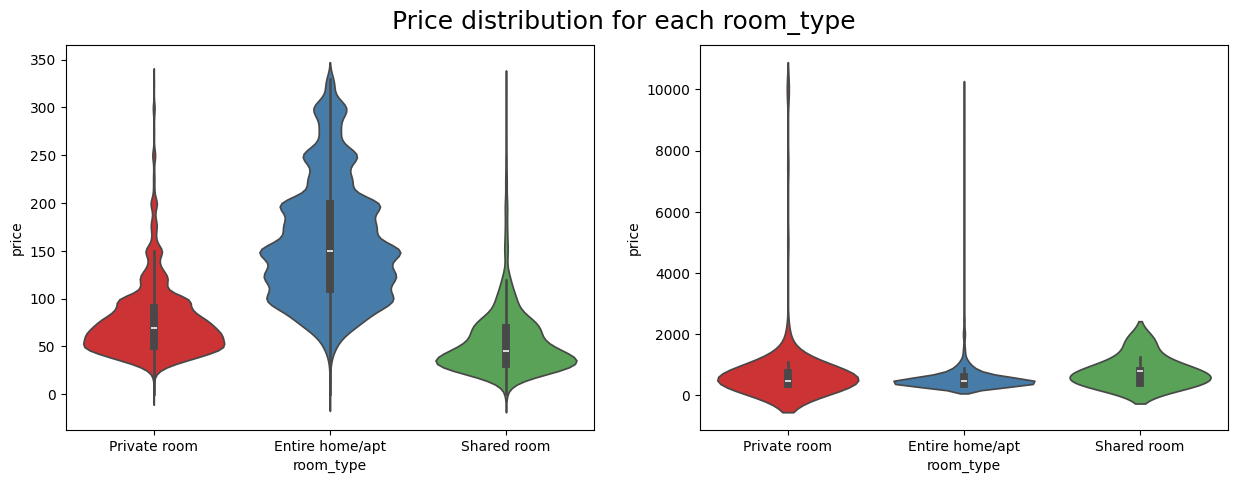

In [44]:
data_plotting_violin(df_summary4,['room_type'])

# PART 3: USE NLTK EXTRACT THE DISTRIBUTION OF WORDS TO SEE THE CONNECTION  BETWEEN PRICE AND PREVIEW WORDS

![Getting Started](MD2.jpg)

## 3.1/ Examine the name column of  original data to create a data frame contain words which is extracted from each row of name column and show it's frequency (top 25) and plot the graph



In [45]:
# Getting list of all name_words from name column:

names = data['name'].tolist()
name_words = []
for name in names:
    name = str(name).split() # using split of each row of name column
    for word in name:
        name_words.append(word.lower())

name_words


['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'by',
 'the',
 'park',
 'skylit',
 'midtown',
 'castle',
 'cozy',
 'entire',
 'floor',
 'of',
 'brownstone',
 'entire',
 'apt:',
 'spacious',
 'studio/loft',
 'by',
 'central',
 'park',
 'large',
 'cozy',
 '1',
 'br',
 'apartment',
 'in',
 'midtown',
 'east',
 'blissartsspace!',
 'large',
 'furnished',
 'room',
 'near',
 "b'way",
 'cozy',
 'clean',
 'guest',
 'room',
 '-',
 'family',
 'apt',
 'cute',
 '&',
 'cozy',
 'lower',
 'east',
 'side',
 '1',
 'bdrm',
 'beautiful',
 '1br',
 'on',
 'upper',
 'west',
 'side',
 'central',
 'manhattan/near',
 'broadway',
 'lovely',
 'room',
 '1,',
 'garden,',
 'best',
 'area,',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'in',
 'manhattan',
 'for',
 'singles',
 'west',
 'village',
 'nest',
 '-',
 'superhost',
 'only',
 '2',
 'stops',
 'to',
 'manhattan',
 'studio',
 'perfect',
 'for',
 'your',
 'parents',
 '+',
 'garden',
 'chelsea',
 'perfect',
 'hip',
 'historic',
 'brownstone',
 'apartment'

In [46]:
#Using nltk package to filter the english words from name_words variable which was created above:

import nltk # natural language toolkit

nltk.download('stopwords')

from nltk.corpus import stopwords

#Here we also filter these words have len>1 for avoid special characters:

filtered_words = [word for word in name_words if (word not in stopwords.words('english')) &  (len(word)>1)]

#Import counter for filtering top 25 most common :
from collections import Counter # to count words in our list

words_count = Counter(filtered_words).most_common()

#This variable contain top 25 most common in words count variable:

words_count_25 = words_count[:25]

words_count_25

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jamesgatsby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('room', 7545),
 ('private', 5792),
 ('bedroom', 5640),
 ('apartment', 4827),
 ('cozy', 3878),
 ('brooklyn', 3012),
 ('studio', 2952),
 ('apt', 2867),
 ('spacious', 2732),
 ('manhattan', 2307),
 ('east', 2284),
 ('park', 2116),
 ('sunny', 2077),
 ('beautiful', 1857),
 ('williamsburg', 1844),
 ('near', 1800),
 ('village', 1641),
 ('heart', 1638),
 ('large', 1497),
 ('loft', 1490),
 ('nyc', 1466),
 ('central', 1384),
 ('home', 1343),
 ('modern', 1343),
 ('luxury', 1177)]

In [51]:
#Create a dataframe of words_df_plot and words_df

words_df_25= pd.DataFrame(words_count_25)

#Rename columns and set_index:

words_df_25.rename(columns={0:"Words", 1:"Frequency"}, inplace=True)
words_df_25.set_index('Words',inplace=True)

#Review dataframe we just created

words_df_25

,Frequency
Words,
room,7545
private,5792
bedroom,5640
apartment,4827
cozy,3878
brooklyn,3012
studio,2952
apt,2867
spacious,2732


Text(0, 0.5, 'Frequency')

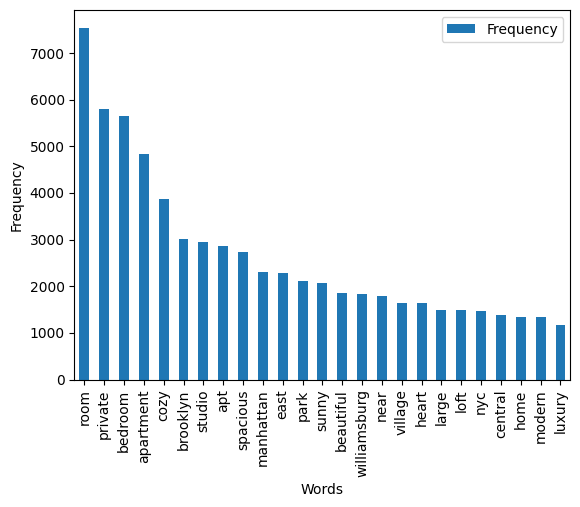

In [52]:
#Top 25 most using words bar plot:

words_df_25.plot.bar()
plt.ylabel('Frequency')

## 3.2/ Create "Percent_Score" column of  words_df_25 (Which is top 25 of words):



In [53]:
words_df_25['Percent_Score']=100*(words_df_25['Frequency']/sum(words_df_25['Frequency']))
words_df_25.reset_index(inplace=True)

words_df_25['Words']=[str(words_df_25['Words'].iloc[i]) for i in range(len(words_df_25))]
words_df_25

,Words,Frequency,Percent_Score
0,room,7545,11.344329
1,private,5792,8.708596
2,bedroom,5640,8.480055
3,apartment,4827,7.257664
4,cozy,3878,5.830790
5,brooklyn,3012,4.528710
6,studio,2952,4.438497
7,apt,2867,4.310695
8,spacious,2732,4.107715
9,manhattan,2307,3.468703


## 3.3/  Calculate Average of percent_score on each row of name column (Here name it as avg_score_combine)



In [54]:
data['name']=[str(data['name'].iloc[i]) for i in range(len(data))]

names=data['name'].values
avg_score_combine=np.ones(len(names))

for i,name in enumerate(names):
    store=[]
    for word in words_df_25['Words'].values:
        if name.find(word)>-1:
            store.append(words_df_25['Percent_Score'].loc[words_df_25['Words']==word].values)
    avg_score_combine[i]=np.mean(store)

avg_score_combine


/Users/jamesgatsby/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jamesgatsby/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([3.17049823,        nan,        nan, ...,        nan, 4.98203251,
              nan])


## 3.4/ Plot the interaction between “Price and  Average of percent_score” (which is avg_score_combine column) on orginal data :



Text(0.5, 1.0, 'Interaction between Price and Average of percent_score')

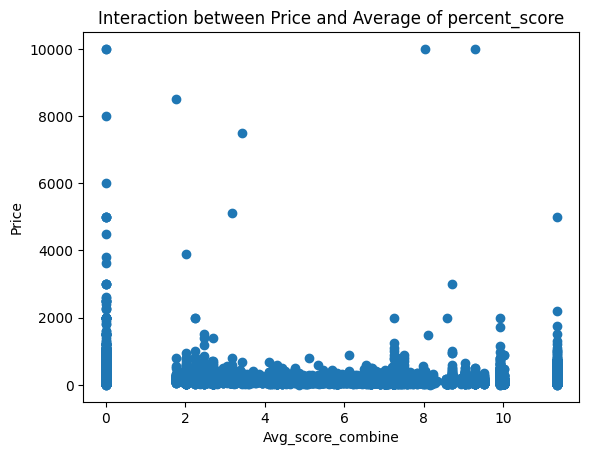

In [57]:
data['avg_score_combine']=avg_score_combine
data['avg_score_combine']=data['avg_score_combine'].fillna(0)
plt.scatter(data['avg_score_combine'],data['price'])
plt.xlabel('Avg_score_combine')
plt.ylabel('Price')
plt.title('Interaction between Price and Average of percent_score')

## 3.5/ Base on the plot above we do Group split base on price percentiles 



In [66]:
group1=data.loc[data['price']>2000]

group2=data.loc[(data['price']<=2000) & (data['price']>330)]

group3=data.loc[(data['price']>101) & (data['price']<=330)]

group4=data.loc[data['price']<=101]


![Getting Started](MD3.jpg)

In [63]:
#Create words_count list which each element is top 25 words of each group we created above:

def words_count_each_groups(group):
    name_words=[]
    names = group['name'].tolist()
    for name in names:
        name = str(name).split()
        for word in name:
            name_words.append(word.lower())
    filtered_words= [word for word in name_words if (word not in stopwords.words('english'))
                                                &  (len(word)>1)]
    words_count_25= Counter(filtered_words).most_common()[:25]
    return(words_count_25)

groups=[group1,group2,group3,group4]
words_count_25_group={}
for i,group in enumerate(groups):
    words_count_25_group[i]=words_count_each_groups(group)

In [70]:
#Create a dict which each element is transform words_count_25_group element into dataframe

d={}
for i in range(len(groups)):
    d['words_df_25_group{}'.format(i+1)]=pd.DataFrame(words_count_25_group[i])
    d['words_df_25_group{}'.format(i+1)].rename(columns={0:"Words", 1:"Count"}, inplace=True)
    d['words_df_25_group{}'.format(i+1)].set_index('Words',inplace=True)



## 4.1/ Plot top 25 words distribution on each groups which we was created above (4 groups)



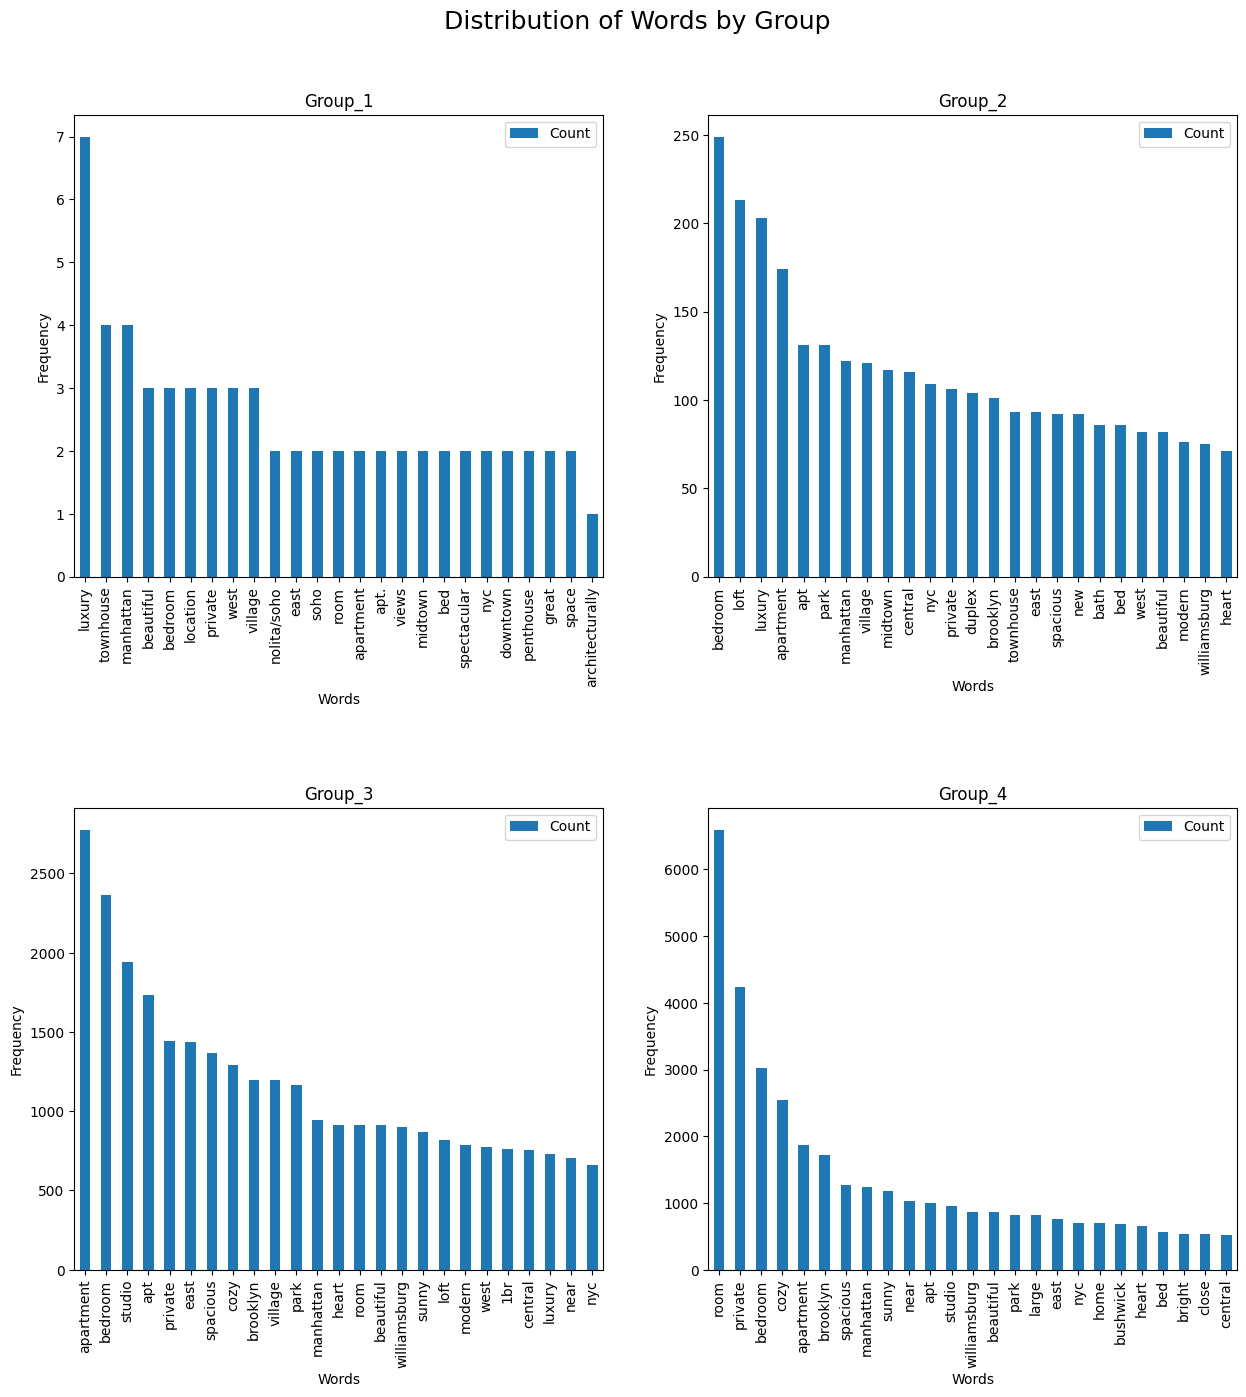

In [71]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.suptitle('Distribution of Words by Group', fontsize=18, y=0.95)
# loop through the length of tickers and keep track of index
for n,dat in enumerate(d):
    # add a new subplot iteratively
    ax=plt.subplot(2,2, n + 1)

    plt.subplot(2,2, n + 1)

    # filter df and plot ticker on the new subplot axi

    d[dat].plot(ax=ax,kind='bar')
    ax.set_title('Group_{}'.format(n+1))
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
plt.show()

## 4.2/ Merge words on each group with words_df_25  which  is 0 when the merge is empty and  then count the condition on (Percent_Score=0) on each group.

In [73]:

d2={}
for i in range(len(groups)):
        #Merge part:

        d2['Group_{}'.format(i+1)]=pd.merge(d['words_df_25_group{}'.format(i+1)],words_df_25,how='left',
                                            on='Words')[['Words','Percent_Score']]

        #Replace empty with 0
        d2['Group_{}'.format(i+1)].fillna(0,inplace=True)

        #Count Percent_score=0
        d2['Group_{}'.format(i+1)]=[sum(d2['Group_{}'.format(i+1)]['Percent_Score']==0)]

d2=pd.DataFrame(d2)
d2


,Group_1,Group_2,Group_3,Group_4
0,15,7,2,4
